In [1]:
import numpy as np
from experiments.utils.SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from experiments.utils.get_avg_classwise_f1 import get_avg_classwise_f1
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from scipy import stats

import numpy as np
from experiments.utils.SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from experiments.utils.get_avg_classwise_f1 import get_avg_classwise_f1
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from scipy import stats
import matplotlib.pyplot as plt

import numpy as np
from experiments.utils.SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from experiments.utils.get_avg_classwise_f1 import get_avg_classwise_f1
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from scipy import stats



In [2]:
rna = DataFetcher.fetch_data('rna N3k')
coli20 =  DataFetcher.fetch_data('coil20')
globe = DataFetcher.fetch_data('globe', size=7000)
fmnist = DataFetcher.fetch_data('fashion mnist', size=7000)
mnist = DataFetcher.fetch_data('mnist', size=7000)

datasets = [rna, coli20,globe,fmnist, mnist]
dataset_names = ['rna N3k', 'coli20', 'globe', 'fashion mnist', 'mnist']

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)
####################
####################
Fetching the "globe" dataset
####################
Dataset loaded
Dataset shape: (7003, 3)
####################
####################
Fetching the "fashion mnist" dataset
####################
Dataset loaded
Dataset shape: (7000, 784)
####################
####################
Fetching the "mnist" dataset


C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


####################
Dataset loaded
Dataset shape: (7000, 784)
####################


####################
A 2D layout of the "globe" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
"Average speed" will be measured on every iteration
####################
"Stress" will be measured every 100 iterations
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################

 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing

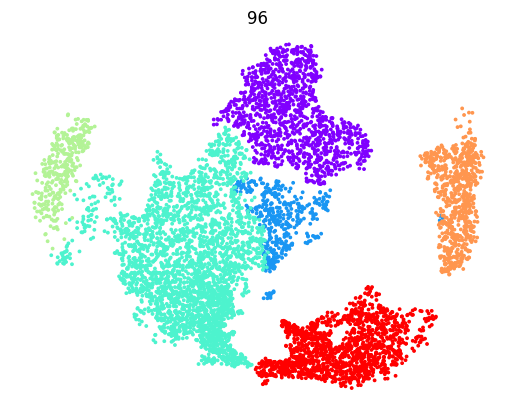

len 31
stop 30
start 1
len 3001
stop 3000
start 100


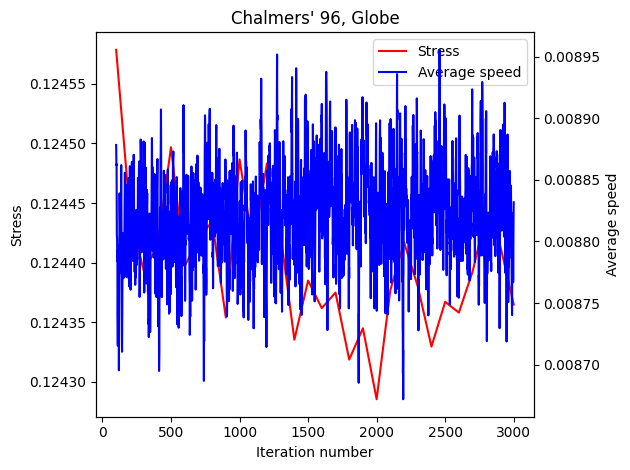

####################
A 2D layout of the "globe" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
"Stress" will be measured every 100 iterations
####################
"Average n-tet stress" will be measured on every iteration
####################
All stress calculations will be performed using the euclidian norm
####################

 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing vectorised euclidean stress 


 Computing v

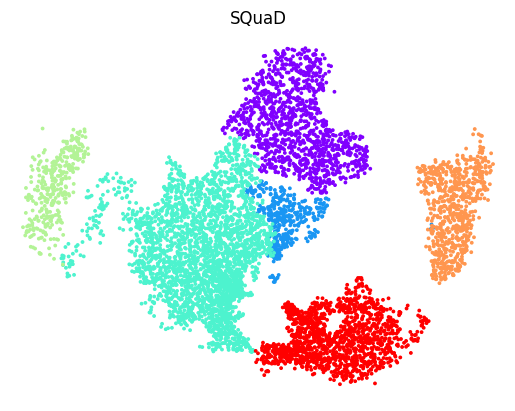

len 31
stop 30
start 1
len 3001
stop 3000
start 100


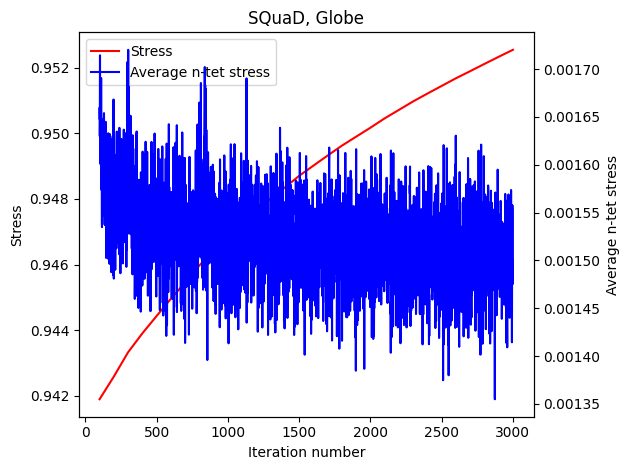

####################
A 2D layout of the "fashion mnist" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
"Average speed" will be measured on every iteration
####################
"Stress" will be measured every 100 iterations
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################

Not enough memory to allocate for a numpy array for stress calculation. 
Stress will be calculated with a Python loop

 Computing un-vectorised euclidean stress 



KeyboardInterrupt: 

In [4]:
metric_collection_96 = {'Average speed': 1, "Stress": 100}

dataset = datasets[0]
iters = 3000
layouts = []

for dataset in datasets[2:]:

    Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
    Xld *= 10/np.std(Xld)
    algo96 = Chalmers96(dataset=dataset,  initial_layout=Xld,
                        damping_constant=0, spring_constant=0.5,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5)

    layout_96 = LayoutCreation.create_layout(algo96, optional_metric_collection=metric_collection_96, no_iters=iters)
    show_layout(layout_96, use_labels=True, title="96")
    show_generation_metrics(layout_96, iters_from=100, average_speed=True, title=f"Chalmers' 96, {dataset.name.capitalize()}")


    metric_collection_squad = { "Stress": 100, "Average n-tet stress": 1}
    squad = SNeD(dataset=dataset, initial_layout=Xld, use_nesterovs_momentum=False, ntet_size=4, momentum=0.1)
    layout_squad = LayoutCreation.create_layout(squad, no_iters=iters,optional_metric_collection=metric_collection_squad)
    show_layout(layout_squad, use_labels=True, title="SQuaD")
    show_generation_metrics(layout_squad, iters_from=100, quartet_stress=True, title=f"SQuaD, {dataset.name.capitalize()}")

    layouts.append((layout_96, layout_squad))



output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/sned_vs_96/out/"))).resolve().absolute()

path_to_pickle_lay = (Path(output_dir).joinpath(Path(f"other_layouts.pickle"))).resolve()
with open(path_to_pickle_lay, 'wb') as pickle_out:
    pickle.dump(layouts, pickle_out)
